In [1]:

#las librerias que uso las tengo instaladas localmente en el env de miniconda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import preprocessing
from pathlib import Path
import os
from os import chdir
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.express as px


## Abstracto

Este trabajo explora el potencial de aprovechar los datos de Glassdoor mediante algoritmos de machine learning. A pesar de desafíos como la tendencia a reseñas negativas y la falta de verificación de la experiencia laboral, los algoritmos pueden analizar patrones en las opiniones de los empleados para predecir tendencias y evaluar la satisfacción laboral. Usando algoritmos estadísticos y de aprendizaje automático pueden analizar datos numéricos como rangos salariales y puntuaciones de reseñas. Mediante métodos de regresión se pueden identificar correlaciones entre variables, permitiendo a las empresas entender cómo los factores como el salario impactan en la satisfacción laboral.Tambien algoritmos de procesamiento del lenguaje natural pueden analizar reseñas de empleados para extraer sentimientos y temas clave o transformar esta data cualitativa para nuestro analisis de regresión. 

Estos análisis pueden ayudar a las empresas a anticipar problemas, mejorar la retención de talento y fortalecer estrategias de marketing. A través de técnicas de machine learning, la información de Glassdoor se convierte en una herramienta poderosa para la toma de decisiones empresariales, permitiendo una comprensión más profunda y precisa del clima laboral y las percepciones de los empleados.

### **Contexto empresarial:**
Glassdoor se ha convertido en la única plataforma que permite ver a profesionales que buscan oportunidades laborales o que quieren tener una idea de una compañía o un punto de comparación a otras. Esta ventaja de mercado la convierte en la única fuente de opiniones  sobre cultura corporativa, rangos de salarios, etc. Está posición dominante lo hace una fuente única de información, además de ser un portal de empleo donde las personas que van aplicar, van a tener una reseña de la empresa que a la cual van aplicar. 

### **Problema empresarial:**
 Para cualquier compañía tener referencias es importante y a través de está información se puede hacer un modelo que ayude a ver qué variables predicen mejor la  tenencia de una opinión muy desfavorable o muy positiva. Este recurso es vital para las empresas al permitirles anticipar necesidades de fuerza laboral, fortalecer áreas clave y mejorar estrategias de atracción y retención de talentoútil para anticiparse a las necesidades de tu fuerza de trabajo, reforzar áreas donde puedes crear un fuerte impacto en el esfuerzo de atracción y retención de talento y además de ser una herramienta de mercadeo de la empresa.  


### **Problema analítico:**

A continuación analizamos algunos aspectos a considerar.Glassdoor, una plataforma líder en el mercado, proporciona valiosas opiniones sobre empresas, salarios y cultura corporativa, siendo una fuente crucial para profesionales y empleadores. Sin embargo, enfrenta desafíos, como la tendencia a reseñas negativas, especialmente tras despidos masivos, y la falta de verificación de la experiencia laboral de los usuarios. A pesar de estas limitaciones, Glassdoor sigue siendo una fuente única y pública de información en un mercado laboral opaco.El dataset tiene un foco especifico en el mercado laboral de UK.

### **Comprende**:





 1.   **date_review:**   Fecha en la que se realizó la reseña.        
 2.   **job_title:**     Rol dentro de la empresa.       
 3.   **current:**        Estatus dentro de la empresa actual.      
 4.  **location:**        Lugar de la empresa (ciudad).    
 5.  **overall_rating:** puntuación total de la empresa (entre 1-5).      
 6.   **work_life_balance:**  opinión del equilibrio entre la vida y del trabajo (1-5) 
 7.   **culture_values:**   opinión de la cultura empresarial (1-5)    
 8.   **diversity_inclusion:**  apreciación sobre el nivel de diversidad e inclusión (1-5)  
 9.   **career_opp:** opinión sobre oportunidades dentro de la empresa (1-5)        
 10.  ***comp_benefits:**   opinión sobre compensación y beneficios (1-5)    
 11.  **senior_mgmt:**  apreciación sobre los directivos de la empresa (1-5).        
 12.  **recommend:**   apreciación sobre si recomendarías esta compañia ("mucho","normal", "malo").          
 13.  **ceo_approv:** apreciación sobre el CEO o dueño de la compañia ("mucho","normal", "malo")..         
 14.  **outlook:**  apreciación sobre el futuro de la empresa ("mucho","normal", "malo").            
 15.  **headline:** comentario a manera de título sobre la empresa.          
 16.  **pros:** comentarios positivos sobre la empresa.                
 17.  **cons:** comentarios negativos sobre la empresa.


## ***Hipotésis:***

 Qué factores ayudan a predecir una buena o mala puntuación sobre una comapañia?
 
 ### **Preguntas secundarias:**
 1. Cuál es el área de más preocupación para una empresa?
 2.  Hay una relación entre algunos de estos factores o son indepndientes?
 3. Afecta el rol en lo que se valora más?
 4.  Estas variables son las mismas dependiendo del tipo de compañia o el sector?
 5. Se puede hacer un perfil de valoración por empresa?



In [2]:
# os.chdir("C:/Users/Rodolfo/Downloads")
# os.getcwd()

# glassdoor_reviews:

googleSheetId = '1Ep8fVrEiaURMXTvh8QgHGmnutUzus0lOUhMEcNUkGIs'
workSheetName = 'reviews'

url ='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId,
    workSheetName
)


print(url)
# industries:
# https://docs.google.com/spreadsheets/d/1NxVL_c17vpUwiaUS72n0SV9-OvCrOKNIUREFKdSHM2Q/edit?usp=share_link
googleSheetId2 = '1NxVL_c17vpUwiaUS72n0SV9-OvCrOKNIUREFKdSHM2Q'
workSheetName2 = 'industries'
url2 ='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId2,
    workSheetName2
)



https://docs.google.com/spreadsheets/d/1Ep8fVrEiaURMXTvh8QgHGmnutUzus0lOUhMEcNUkGIs/gviz/tq?tqx=out:csv&sheet=reviews


In [3]:
df = read_csv(url)
industries = read_csv(url2)

df.head(8)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,NaN,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,NaN,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
5,AFH-Wealth-Management,2016-05-26,Office Administrator,"Current Employee, less than 1 year",NaN,3,4.0,2.0,NaN,2.0,3.0,2.0,o,r,r,Office administrator,Some good people to work with.\n\nFlexible wor...,Morale.\n\nLack of managerial structure.\n\nDo...
6,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
7,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,NaN,5.0,4.0,5.0,v,o,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...


In [4]:
df['overall_rating'].value_counts()

overall_rating
4    98350
5    76079
3    65455
2    25372
1    21118
Name: count, dtype: int64

In [5]:
df.head(6)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,NaN,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,NaN,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
5,AFH-Wealth-Management,2016-05-26,Office Administrator,"Current Employee, less than 1 year",NaN,3,4.0,2.0,NaN,2.0,3.0,2.0,o,r,r,Office administrator,Some good people to work with.\n\nFlexible wor...,Morale.\n\nLack of managerial structure.\n\nDo...


In [6]:
df.describe()

df.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286374 entries, 0 to 286373
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 286374 non-null  object 
 1   date_review          286374 non-null  object 
 2   job_title            259076 non-null  object 
 3   current              286374 non-null  object 
 4   location             188641 non-null  object 
 5   overall_rating       286374 non-null  int64  
 6   work_life_balance    238886 non-null  float64
 7   culture_values       224590 non-null  float64
 8   diversity_inclusion  47964 non-null   float64
 9   career_opp           239451 non-null  float64
 10  comp_benefits        238888 non-null  float64
 11  senior_mgmt          237138 non-null  float64
 12  recommend            286374 non-null  object 
 13  ceo_approv           286374 non-null  object 
 14  outlook              286374 non-null  object 
 15  headline         

> A simple vista podemos observar que hay las columnas de "location" y "diversity_inclusion" tienen un numero importante de valores nulos. Lo cual puede hacer su uso en un modelo dificil. También hay columnas, como "job_title", que tienen valores vacios que hay que manejar. Primero convirtiendolos en nulos y después, dependiendo de la cantidad, ver que estrategía utilizar para poder aprovecharlos.

In [8]:
df.duplicated().sum()

9168

# Variable Target: Overall_Rating

La variable objetivo es de tipo númerica, así que podemos utilizar un modelo de tipo Aprendizaje supervisado y algoritmos de Regresión.

Se explorarán en consiguiente el comportamiento de la variable con algunos analisis estadísticos. 




In [9]:
target_variable = df['overall_rating']

target_variable.describe().round(2)

count    286374.00
mean          3.64
std           1.18
min           1.00
25%           3.00
50%           4.00
75%           5.00
max           5.00
Name: overall_rating, dtype: float64

3.63867529873522


c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribución de Overall_Rating')

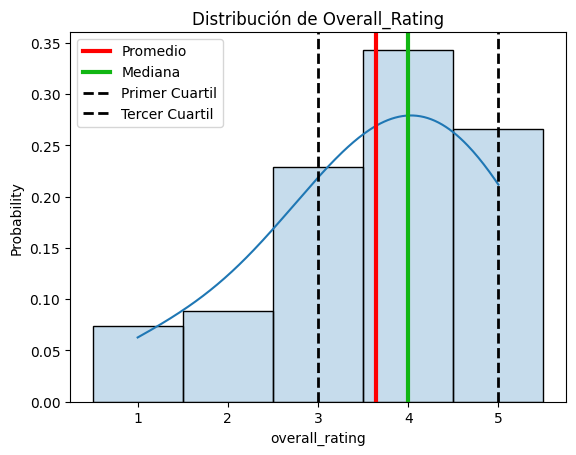

In [10]:
#Distribución de variable target 
media = target_variable.mean()
mediana = target_variable.median()
primer_cuartil = target_variable.quantile(0.25)
tercer_cuartil = target_variable.quantile(0.75)

print(media)
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'overall_rating',
             bins = 5,            
             alpha = 0.25,
             discrete= True,
             kde = True,
             kde_kws = dict(
                 bw_adjust=9
             ),
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Overall_Rating')



## Analisis de  variable Target: Overall_Rating

La variable objetivo sigue una distribución asimetrica neativa (la mediana es mayor que el promedio), concentrando una porción importante en reseñas con valores altos, y se observan pocos valores bajos.

Para este tipo de distibuciones, es apropiado utilizar una técnica de normalización que permita preparar nuestra data para otro tipo de análisis.

Se preesentará a continuación la distribución con 

[[2]
 [2]
 [1]
 ...
 [3]
 [4]
 [5]]


c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

Text(0.5, 1.0, 'Log')

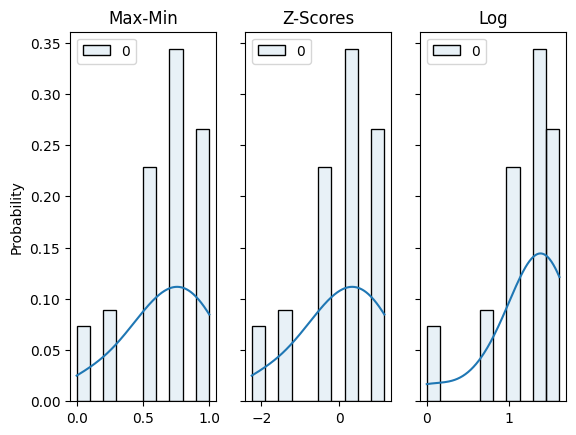

In [11]:

targetVarNorm = target_variable.values.reshape(-1, 1)

min_max_scaler = preprocessing.MinMaxScaler()

print(targetVarNorm)
X_train_minmax = min_max_scaler.fit_transform(targetVarNorm)


scaler = preprocessing.StandardScaler()
zscores = scaler.fit_transform(targetVarNorm)

logRatings = np.log(targetVarNorm)

fig, axs = plt.subplots(ncols=3, sharey= True)

sns.histplot(data = X_train_minmax,

             alpha = 0.1,
             kde = True,
             bins=10,
             stat='probability',
             color = '#B76BCB',
             kde_kws = dict(
                 bw_adjust=9
             ),
             ax=axs[0]
)
axs[0].set_title('Max-Min')

sns.histplot(data = zscores,
             alpha = 0.1,
             kde = True,
             bins=10,
             stat='probability',
             color = '#B76BCB',
             kde_kws = dict(
                 bw_adjust=9
             ),
             ax=axs[1]
)
axs[1].set_title('Z-Scores')

sns.histplot(data = logRatings,
             

             alpha = 0.1,
             kde = True,
             bins=10,
             stat='probability',
             color = '#B76BCB',
             kde_kws = dict(
                 bw_adjust=9
             ),
             ax=axs[2]
)
axs[2].set_title('Log')



In [12]:
target_variable.unique()

array([2, 1, 5, 3, 4], dtype=int64)

In [13]:
df['overall_rating'].unique()

array([2, 1, 5, 3, 4], dtype=int64)

## Conclusión: 
El proceso de normalizacion no ha cambiado mucho la distribución pero en variables con un rango tan pequeño de valores discretos es de esperarse. 

## Tratamiento de features


A continuación haremos algunas transformaciones necesarias para seguir explorando el valor de la data.







### 1.   Outlook, Recommend, CEO_Approv:
Para poder realizar nuestro análisis supervisado, vamos a tener que convertir algunas de nuestras variables cualitativas que tienen carácter ordinal en variables númericas para su procesamiento. 
Las recomendaciones de la compañia , CEO , y futuro de la empresa le han colocado las categorías v, r, x, and o, con el siguiente significado:
v - Positivo, r - Más o Menos, x - Negativo, o - Sin opinión

A continuación exploraremos esas variables para entender su comportamiento:

In [14]:
df_ordinales = df[['recommend', 'ceo_approv', 'outlook']]
print(
    df_ordinales['recommend'].value_counts()/len(df_ordinales)*100, '\n\n',

    df_ordinales['ceo_approv'].value_counts()/len(df_ordinales)*100, '\n\n',

    df_ordinales['outlook'].value_counts()/len(df_ordinales)*100

)

recommend
v    51.804633
o    26.935406
x    21.259961
Name: count, dtype: float64 

 ceo_approv
o    36.003618
v    35.641504
r    21.502301
x     6.852577
Name: count, dtype: float64 

 outlook
v    37.307856
o    34.057212
r    18.090679
x    10.544253
Name: count, dtype: float64


In [15]:
import random

#No estamos seguros de que significa cuando una persona dice Más o Menos, entonces generamos un numero al azar entre ambos extremos.
#Otra solución posible sería hacer la escala del 1-3 para que no hay espacio para la interpretación.

dict_ordinal_cat = {'v': 5, 'x': 1, 'r': random.randint(2,4), 'o': np.NaN }

for col in df_ordinales.columns:
    print(col)
    df_ordinales[f'{col}']= df_ordinales[f'{col}'].map(dict_ordinal_cat)


print(
    df_ordinales['recommend'].value_counts()/len(df_ordinales)*100, '\n\n',

    df_ordinales['ceo_approv'].value_counts()/len(df_ordinales)*100, '\n\n',

    df_ordinales['outlook'].value_counts()/len(df_ordinales)*100

)


recommend
ceo_approv
outlook
recommend
5.0    51.804633
1.0    21.259961
Name: count, dtype: float64 

 ceo_approv
5.0    35.641504
2.0    21.502301
1.0     6.852577
Name: count, dtype: float64 

 outlook
5.0    37.307856
2.0    18.090679
1.0    10.544253
Name: count, dtype: float64


C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_31140\2688639698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinales[f'{col}']= df_ordinales[f'{col}'].map(dict_ordinal_cat)
C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_31140\2688639698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinales[f'{col}']= df_ordinales[f'{col}'].map(dict_ordinal_cat)
C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_31140\2688639698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

### 2. Pros, Cons, Headline:

 Estas variables son textos de carácter cualitativo, pero para explotar su valor en nuestro modelo necesitamos poder transformarlas en un valor númerico. Para se utilizará a continuación un framework de Sentiment Analysis que permite convertir textos y sacar un rango de -1 a 1, siendo -1 expresiones de mucha negatividad y 1 expresiones muy positivas.  

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()



sentiment_scores = df[['headline', 'cons', 'pros']].map(lambda x: analyzer.polarity_scores(str(x)), na_action='ignore')
print(sentiment_scores['headline'][286369	] )



{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}


In [17]:
# sentiment_scores.rename( columns={'headline':'headline_num', 'cons':'cons_num', 'pros':'pros_num'})

sentiment_scores = sentiment_scores.map(lambda x: x['compound'], na_action='ignore' )

In [18]:
df = df.join(sentiment_scores ,rsuffix='_num')

### 3. Compañias y Cargos:

Estas variables no son transformables pero son las vairables cualitativas nominales que son muy interesantes para contextualizar los resultado de nuestro analisís.

In [19]:


firms = df[['firm', 'job_title']]
firms.describe()
print((firms['job_title'].value_counts())/df.shape[0]*100)

job_title
Anonymous Employee              19.260827
Consultant                       2.785518
Manager                          2.343090
Senior Consultant                2.206206
Analyst                          2.006467
                                  ...    
CHANGE ASSURANCE                 0.000349
OTC Clearing/Prime Brokerage     0.000349
RISK & CONTROL ANALYST           0.000349
Unspecified                      0.000349
Ad Sense Sales Manager           0.000349
Name: count, Length: 26786, dtype: float64




> Podemos observar que un 19% de los reviews son anónimos y un 9.5% están vacios. En este caso es válido simplemente agregarlos a la categoría de anónimo que básicamente corresponde con la misma clasificación. Dejando los anónimos  como un 31% apróximadamente. Por la naturaleza de los reviews de Glassdoor tiene sentido que haya muchas reviews que se nieguen a poner el rol y la empresa.       


In [20]:
print((firms['firm'].value_counts())/df.shape[0]*100)

(firms['firm'].value_counts()/df.shape[0]*100)

firm
Deloitte                                              16.410358
EY                                                    11.890046
Apple                                                  7.262182
Citi                                                   6.539001
Barclays                                               3.390671
                                                        ...    
Animal-and-Plant-Health-Agency                         0.007682
BayWa-r-e-renewable-energy                             0.006285
Engineering-and-Physical-Sciences-Research-Council     0.005936
Abertawe-Bro-Morgannwg-University-Health-Board         0.003143
Achieving-for-Children                                 0.002095
Name: count, Length: 149, dtype: float64


firm
Deloitte                                              16.410358
EY                                                    11.890046
Apple                                                  7.262182
Citi                                                   6.539001
Barclays                                               3.390671
                                                        ...    
Animal-and-Plant-Health-Agency                         0.007682
BayWa-r-e-renewable-energy                             0.006285
Engineering-and-Physical-Sciences-Research-Council     0.005936
Abertawe-Bro-Morgannwg-University-Health-Board         0.003143
Achieving-for-Children                                 0.002095
Name: count, Length: 149, dtype: float64

>De la misma forma podemos observar que hay una representación muy grande en la muestra de pocas empresas, siendo estas Delloite (16.4%), Ernest & Young (12%), Apple (7%), Citi Bank (6,5%) y la entidad financiera Barclay's (3.39%). Con casi el 40% de los reviews. Sería interesante estudiar el dataset filtrando estas empresas a ver que tan distinto llegan a ser los resultados.


In [21]:
firms['firm'].unique()

array(['AFH-Wealth-Management', 'AJ-Bell', 'ALDI', 'AQA', 'ASDA', 'ASOS',
       'AXA-UK', 'Abcam',
       'Abertawe-Bro-Morgannwg-University-Health-Board', 'Accenture',
       'Accor', 'Achieving-for-Children', 'ActionCOACH',
       'Active-Care-Group', 'Adecco', 'Age-UK-The-National-Charity',
       'AlixPartners', 'American-Express', 'Amey', 'Angard-Staffing',
       'Anglian-Water', 'Anglo-American',
       'Animal-and-Plant-Health-Agency', 'Aon', 'Apple', 'Arcadia',
       'Arnold-Clark', 'AstraZeneca', 'Aviva', 'B-and-M-Retail',
       'B-and-Q', 'BAT', 'BBC', 'BDO', 'BHS', 'BIS', 'BNP-Paribas',
       'BNY-Mellon', 'BP', 'BPP-Holdings', 'BT',
       'Babcock-International-Group', 'Babylon-Health',
       'Bain-and-Company', 'Balfour-Beatty', 'Bannatyne-Group',
       'Barchester-Healthcare', 'Barclays', 'Barnardo-s',
       'Barnet-and-Chase-Farm-Hospitals-NHS-Trust', 'Barnett-Waddingham',
       'Barratt-Developments', 'Barts-Health-NHS-Trust',
       'BayWa-r-e-renewable-energ

### 3. Industria

Esta variable fue generada manualmente, con información de LinkedIn sobre las compañias o sus páginas web. El número de categorías fue reducido en la medida de lo posible. Hay varias empresas cuyo sector era demasido nicho, como por ejemplo Christies que es la compañia más grande de objetos y arte de lujo en el mundo (junto a Sotheby's), que se colocó en una categoría llamada "Otro" para destilar un poco información. Del mismo modo hay compañias de desarrollo de software, SaS Y desarrollo de tecnología  que se juntaron en la categoría de IT. El objetivo es que las categorías tengan mamyor poder explicativo:

In [22]:
industries['firm'] = industries['firm'].str.replace("'","",)
industries

,firm,industry,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Abcam,Healthcare,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abertawe-Bro-Morgannwg-University-Health-Board,Healthcare,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accenture,Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accor,Hospitality,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Achieving-for-Children,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
144,GlaxoSmithKline,Pharmaceutical,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,GLL,Pharmaceutical,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Goldman-Sachs,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Google,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#genero un diccionario key-value 
industry_dict = dict(zip(industries['firm'], industries['industry']))


#lo uso para mapear los valores a cada una de las compañias
df['industry'] = df['firm'].map(industry_dict)

overall_mean = df.groupby(['firm','industry'],as_index=False)['overall_rating'].agg(['mean','count'])

print(overall_mean)

fig = px.scatter(overall_mean , x='mean',y='count', color='industry', log_y= True,
  hover_name='firm', labels={'mean': "overall rating", 'count':'number of reviews'}, size= 'mean',
  title='Puntaje Total Promedio por Compañia')


fig.show()

print('promedio de todos los reviews:' + str(df['overall_rating'].mean())+ '|' + 'promedio no pesado:'+ str(overall_mean['mean'].mean()))

                      firm        industry      mean  count
0    AFH-Wealth-Management         Finance  2.904762     63
1                  AJ-Bell         Finance  3.359649    114
2                     ALDI          Retail  3.422127    931
3                      AQA       Education  3.622807    114
4                     ASDA          Retail  3.352521   4760
..                     ...             ...       ...    ...
144                Gateley  Legal Services  4.540984     61
145               Gi-Group      Consulting  3.392857    196
146        GlaxoSmithKline  Pharmaceutical  3.698016   5646
147          Goldman-Sachs         Finance  3.846730   8808
148                 Google              IT  4.036290    248

[149 rows x 4 columns]


promedio de todos los reviews:3.63867529873522|promedio no pesado:3.5488595982550586


In [24]:
df['overall_rating'].head()

0    2
1    2
2    1
3    5
4    1
Name: overall_rating, dtype: int64

> No hay una diferencia muy significativa entre los dos tipos de promedio y como demuestra el gráfico el puntaje de la mayoría de las empresas estan concentradas alrededor del 3,5-3,6. Hay tres empresas que tienen puntuaciones muy por debajo del promedio. 

Text(1.0, 1.0, 'Opiniones por empresa')

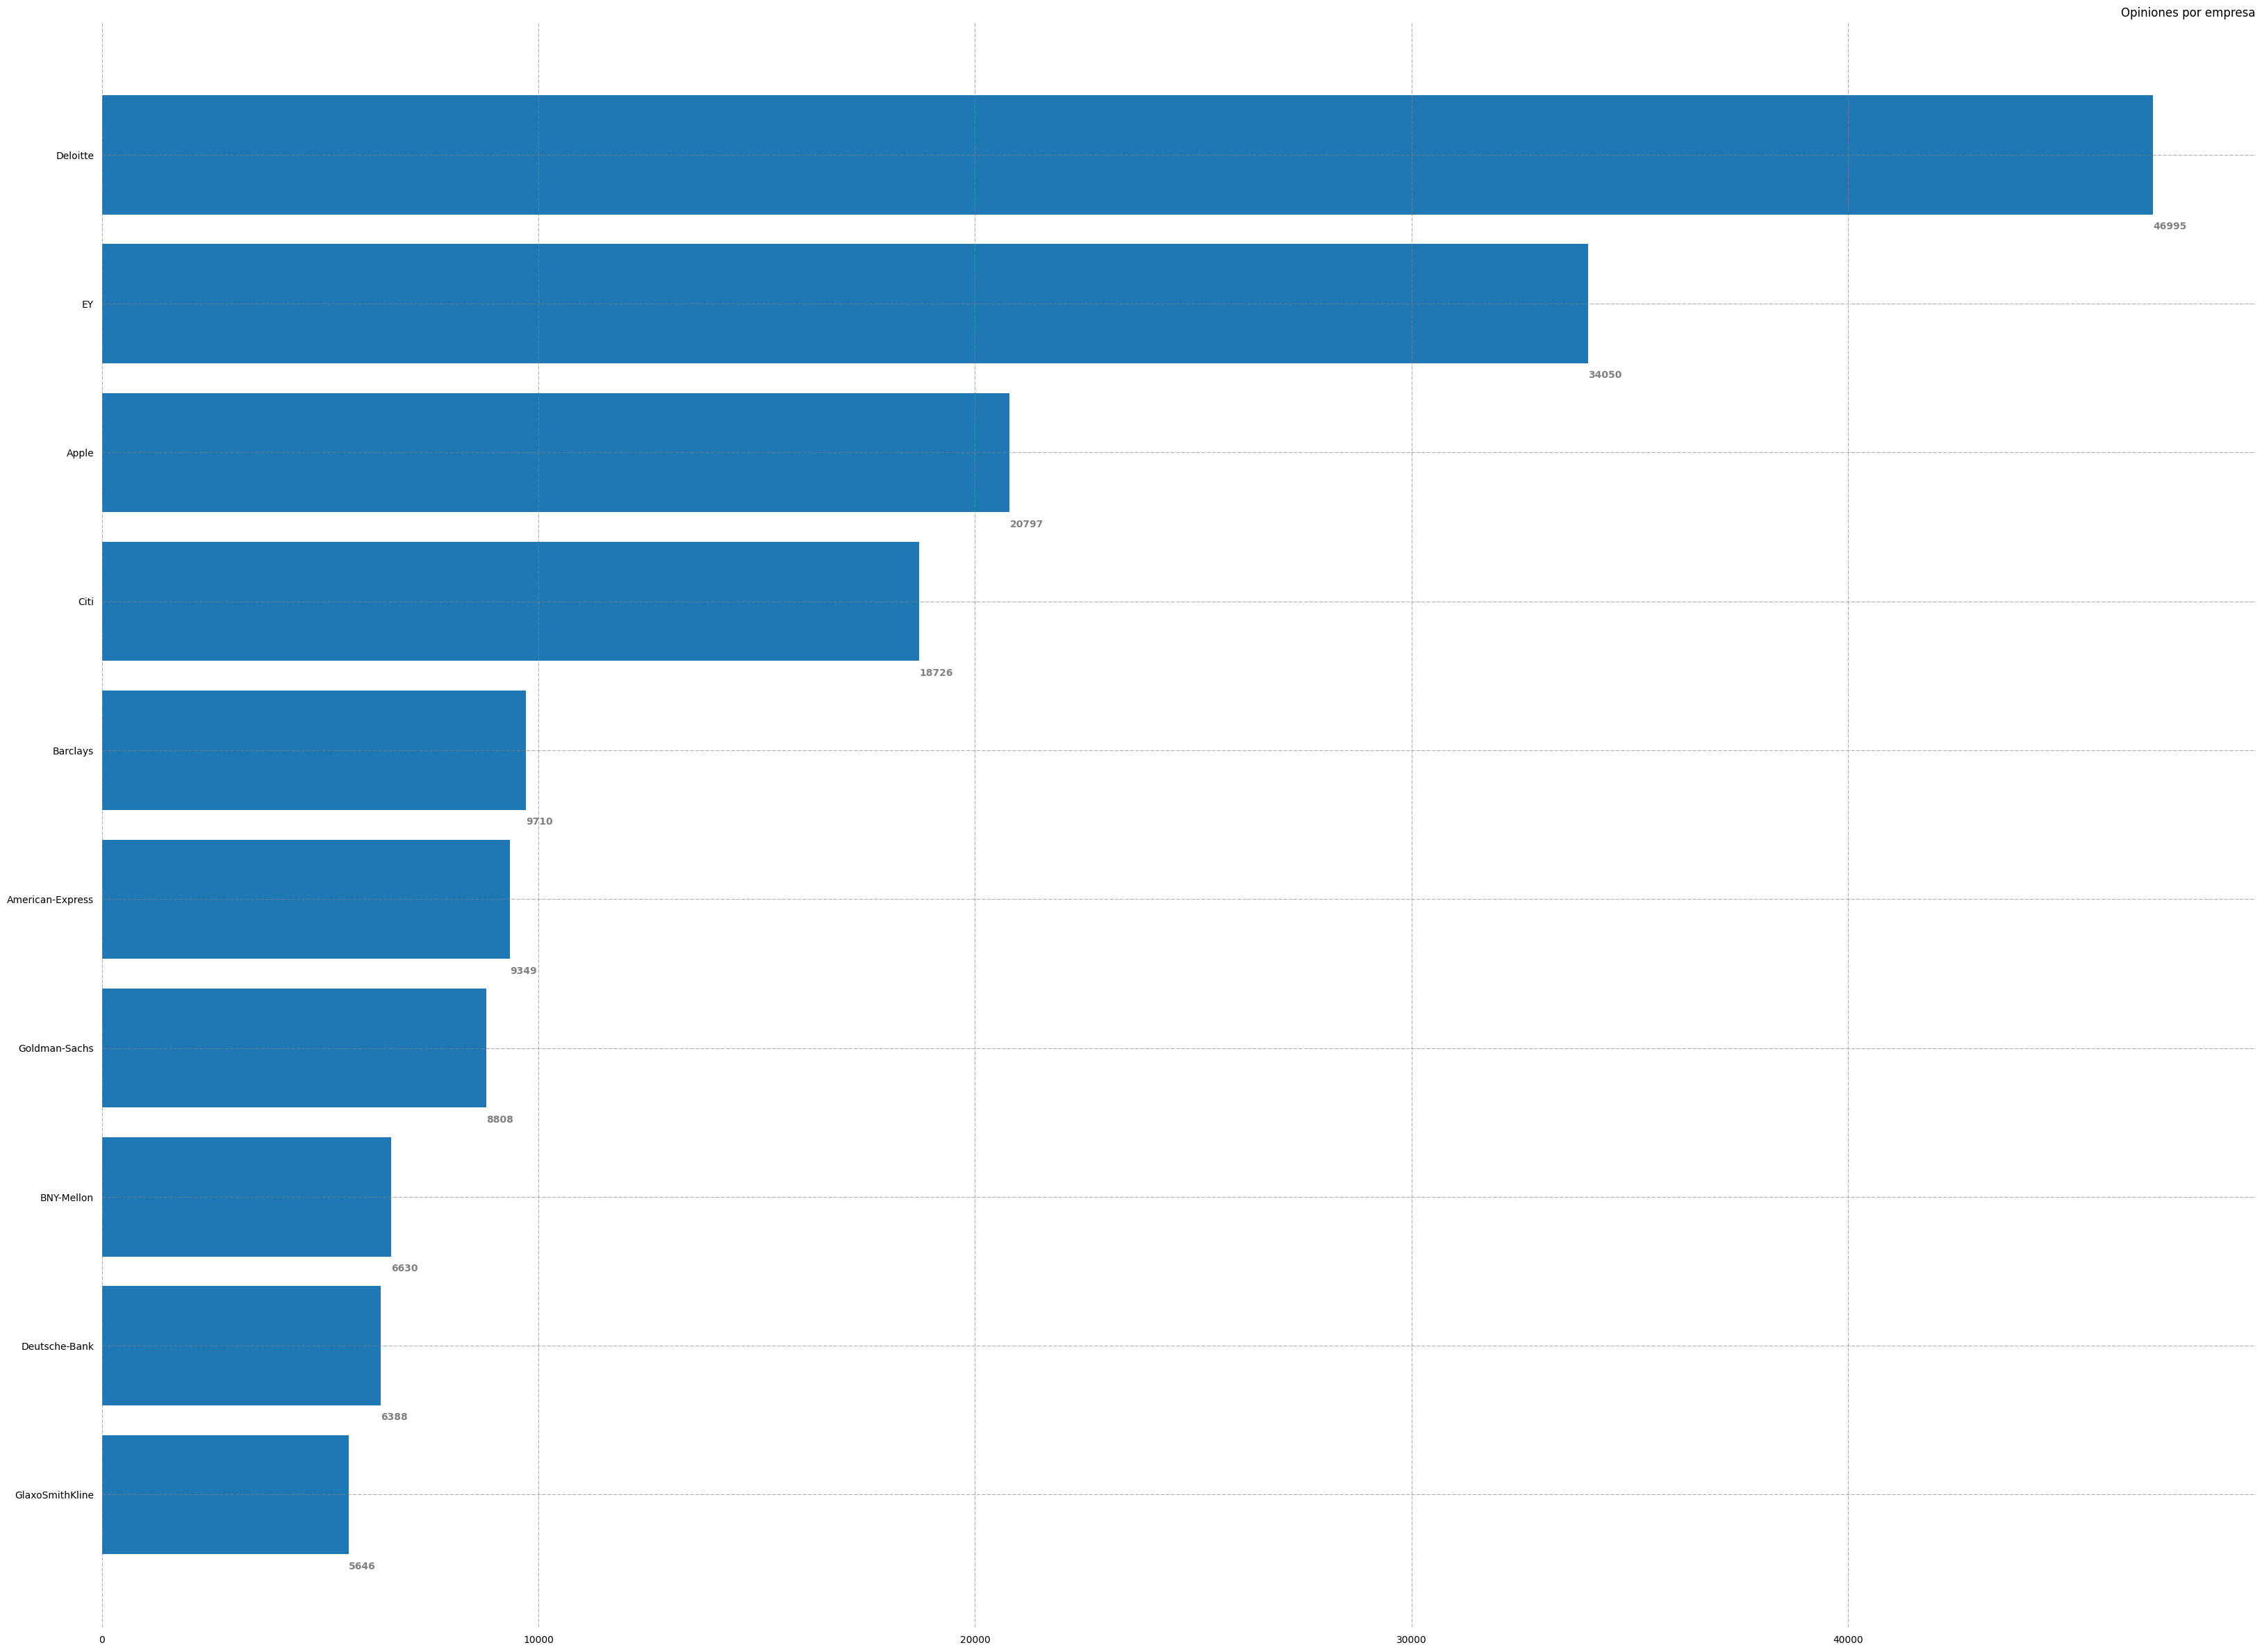

In [25]:


toptenfirms = firms['firm'].value_counts().head(10)

fig, ax = plt.subplots(figsize =(40,30))




review_quantity = toptenfirms.values
firm_names = toptenfirms.index

ax.barh(firm_names, review_quantity)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 1)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.6, i.get_y()+0.9,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Opiniones por empresa',
             loc ='right', )



# Show Plot
# plt.show()

In [26]:
#Filtramos los resultados por pertenencia a estas compañias

Not_DEACB_firms = df[~df['firm'].isin(['Deloitte','EY','Apple','Citi','Barclays'])]

DEACB_firms = df[df['firm'].isin(['Deloitte','EY','Apple','Citi','Barclays'])]

In [27]:
print((Not_DEACB_firms['firm'].value_counts())/df.shape[0]*100)

firm
American-Express                                      3.264612
Goldman-Sachs                                         3.075698
BNY-Mellon                                            2.315154
Deutsche-Bank                                         2.230649
GlaxoSmithKline                                       1.971548
                                                        ...   
Animal-and-Plant-Health-Agency                        0.007682
BayWa-r-e-renewable-energy                            0.006285
Engineering-and-Physical-Sciences-Research-Council    0.005936
Abertawe-Bro-Morgannwg-University-Health-Board        0.003143
Achieving-for-Children                                0.002095
Name: count, Length: 144, dtype: float64


In [28]:
#agregar a df o firms una columna que conterga si pertenecen o no a la distribución normal
# ver como la profesora hizo el grafico en una escala logaritmica para ver si normaliza el dataset

# no sé porque 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
@interact_manual

def countplots(
    column = list(df.select_dtypes('number').columns)
):
    fig, axs = plt.subplots(ncols=3, sharey= True)

    fig.suptitle(f'Distribución de {column}')
    sns.countplot(data=DEACB_firms, x=column, 
        palette="pastel", edgecolor=".6", ax=axs[0])
    axs[0].set_title('Firmas del Top 10')
    sns.countplot(data=Not_DEACB_firms, x=column, 
        palette="pastel", edgecolor=".6", ax=axs[1])
    axs[1].set_title('Resto de compañias')
    sns.countplot(data=df, x=column, 
        palette="pastel", edgecolor=".6", ax=axs[2])
    axs[2].set_title('Todas las compañias')
    
    plt.show()                             


interactive(children=(Dropdown(description='column', options=('overall_rating', 'work_life_balance', 'culture_…

> El top diez de  las compañias por cantidad de reseñas tiene una menor menos puntuaciones de 1 ó 2 pero parece tener una distribución de estas reseñas que sigue la tendencia del resto de las compañias de la muestra. La tendencia demuestra una concentración de reseñas con valores superiores a tres en los tres escenarios. Y tambin tanto para las empresas más reseñadas y el resto el valor que más ponen en sus reseñas es 4. 

> Sin embargo, cuando nos movemos a las variables de oportunidad de crecimieto o 

## Tratamiento de vacíos 
Para cada uno de los campos que cuentan con al menos un valor faltante hay que evaluar la estrategia más adecuada para darle tratamiento. 
<br> <br/>
**Entonces:** 
1. Identificar la columna que contiene vacíos
2. Intentar entender a qué se debe el valor faltante. ¿Es porque no se capturó el dato? ¿Fue un error de procedimiento? ¿Es una categoría más? ¿Es correcto que exista el campo vacío ya que no tiene presencia en ese registro? 
3. De acuerdo a cada caso particular, definir la estrategia más adecuada. ¿Inputo a todos los vacíos con un valor, como el mínimo, el máximo, el promedio, la mediana? ¿Uso algún modelo de inputación? ¿Asigno una categoría? 
<br> <br/>





 



In [29]:
df= df.join(df_ordinales,rsuffix='_num')
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False)
      ,'\n','\n',
      round(columnas_con_nulos.sort_values(ascending=False)/df.shape[0]*100))

Cantidad de columnas con valores vacíos:
(17,)

Variables con valores vacíos: 
diversity_inclusion    238410
ceo_approv_num         103105
location                97733
outlook_num             97531
recommend_num           77136
culture_values          61784
senior_mgmt             49236
work_life_balance       47488
comp_benefits           47486
career_opp              46923
job_title               27298
headline_num              930
headline                  930
cons_num                    6
cons                        6
pros_num                    1
pros                        1
dtype: int64 
 
 diversity_inclusion    83.0
ceo_approv_num         36.0
location               34.0
outlook_num            34.0
recommend_num          27.0
culture_values         22.0
senior_mgmt            17.0
work_life_balance      17.0
comp_benefits          17.0
career_opp             16.0
job_title              10.0
headline_num            0.0
headline                0.0
cons_num                0.0
co

In [30]:
duplicate_cols = df.columns[df.columns.duplicated()]
df.drop(columns=duplicate_cols, inplace=True)

#### Missing con más del 30%

* **Diversidad e Inclusión:**
La variable con mayor cantidad de valores vacíos es **diversity_inclusion**, que indica un puntaje del 1-5 en el aspecto de inclusion y diversidad de las empresas.
<br> <br/>
Los valores de está variable son una puntuación del 1 al 5, con uno siendo lo más negativo y 5 lo mejor que una compañía puede ser dentro de esa categoría. Los valores nulos en este caso no es una fuente de información y los valores faltantes son tantos que cualquier método de imputación sería muy especulativo.
<br> <br/>

 <br> <br/>
**¿Entonces?**
 <br> <br/>
 En este caso esta feauture no debería recibir ningun tratamiento especial, por la falta de informacion es preferible no usarla en el modelo.

  *  **Location:** Está en un rango de 34% donde hay que tomar una decisión donde la variable podría empezar a considerarse para removerla dependiendo de su importancia.


 *  **outlook_num:** Está en un rango de 34% y del mismo modo tenemos que ver si perdemos una feauture importante que no estamos utilizando.



#### Missing con menos del 30%

Ya dentro de este rango es una buena práctica obtar por técnicas de imputación para no perder información valiosa para nuestro modelo. 

* **recommend_num**          26.93
* **culture_values**         21.57
* **senior_mgmt**           17.19
* **work_life_balance**      16.58
* **comp_benefits**          16.58
* **career_opp**             16.38
* **job_title**               9.53


#### Missing con menos del 5%

Es seguro eliminar valores en este rango pero también es posible imputarlos con técnicas simples como el uso de moda o promedios.

* **headline_num**             0.32

* **cons_num**                0.002

* **pros_num**                0.000349



In [63]:
df.iloc[df[df['cons_num'].isna()== True].index] 

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,...,headline,pros,cons,headline_num,cons_num,pros_num,industry,recommend_num,ceo_approv_num,outlook_num
17069,American-Express,2016-05-30,NaN,Current Employee,"Gurgaon, Haryana, Haryana",4,NaN,NaN,NaN,NaN,...,Director,Great place to work and enough opportunites in...,NaN,0.0000,NaN,0.6249,Finance,NaN,NaN,NaN
62585,BNP-Paribas,2015-12-03,GECD Middle Office Trade Support,"Current Employee, more than 5 years",Paris,4,NaN,NaN,NaN,NaN,...,Assistant Vice President,"Great benefits, great work atmosphere",NaN,0.0000,NaN,0.8957,Finance,NaN,NaN,NaN
197269,Deloitte,2019-07-18,Associate Analyst,"Current Employee, more than 1 year",Hyderābād,5,5.0,5.0,NaN,5.0,...,Great experience for a fresher,we get to work with different technologies and...,NaN,0.6249,NaN,0.5859,Consulting,5.0,5.0,5.0
244086,EY,2017-02-07,NaN,Current Employee,NaN,5,4.0,5.0,NaN,5.0,...,"Great place to work, learn, and develop",Great People and interesting work,NaN,0.6249,NaN,0.7783,Consulting,5.0,5.0,5.0
253772,EY,2019-09-17,Senior Consultant,"Former Employee, more than 3 years",Koch,5,4.0,4.0,NaN,4.0,...,Senior Consultant,"Good working Environment, Lots of new technol...",NaN,0.0000,NaN,0.4404,Consulting,5.0,5.0,5.0
286373,Google,2009-05-13,"Manager, Online Sales & Operations",Former Employee,"Mountain View, CA",5,5.0,NaN,NaN,4.0,...,"Still a great company to work for, but underst...",Google offers a great environment where you ar...,NaN,0.3716,NaN,0.8176,IT,5.0,5.0,NaN


In [64]:
cons_promedio = df['cons_num'].mean()
df.loc[df[df['cons_num'].isna()== True].index, 'cons_num']= cons_promedio

In [65]:
df['cons_num'].isna().sum()

0

In [43]:
indexdp = df[df['cons_num'].isna()== True]

print(indexdp)

                    firm date_review                            job_title  \
17069   American-Express  2016-05-30                                  NaN   
62585        BNP-Paribas  2015-12-03     GECD Middle Office Trade Support   
197269          Deloitte  2019-07-18                    Associate Analyst   
244086                EY  2017-02-07                                  NaN   
253772                EY  2019-09-17                    Senior Consultant   
286373            Google  2009-05-13   Manager, Online Sales & Operations   

                                    current                   location  \
17069                      Current Employee  Gurgaon, Haryana, Haryana   
62585   Current Employee, more than 5 years                      Paris   
197269   Current Employee, more than 1 year                  Hyderābād   
244086                     Current Employee                        NaN   
253772   Former Employee, more than 3 years                       Koch   
286373          

In [33]:
df[df['pros_num'].isna()== True]=df[df['pros_num'].isna()== True].replace()

Index([34], dtype='int64')

In [34]:
dpindex = df[df['pros_num'].isna()== True].index
df.drop(index=dpindex)

dpindex = df[df['pros'].isna()== True].index
df.drop(index=dpindex)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,...,headline,pros,cons,headline_num,cons_num,pros_num,industry,recommend_num,ceo_approv_num,outlook_num
0,AFH-Wealth-Management,2015-04-05,NaN,Current Employee,NaN,2,4.0,3.0,NaN,2.0,...,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.",-0.4767,-0.7351,0.8610,Finance,1.0,NaN,2.0
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,...,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,0.1531,-0.8663,0.7184,Finance,1.0,NaN,2.0
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,...,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",-0.6808,0.1709,0.4404,Finance,1.0,NaN,1.0
3,AFH-Wealth-Management,2016-04-16,NaN,Current Employee,NaN,5,2.0,3.0,NaN,2.0,...,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,0.3612,-0.6486,0.4215,Finance,1.0,NaN,2.0
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,...,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",0.0000,-0.7861,0.6908,Finance,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286369,Google,2009-05-10,Accountant,Former Employee,NaN,5,5.0,NaN,NaN,5.0,...,Great place,I've also heard about how Google's stack ranki...,A few years ago during the internet boom we al...,0.6249,0.9253,0.4592,IT,5.0,2.0,NaN
286370,Google,2009-05-10,Software Engineer,Current Employee,"Mountain View, CA",4,3.0,NaN,NaN,3.0,...,Big company with pockets of start-up projects,"Your colleagues are smart, motivated, inventiv...",Big company syndrome. We have dozens of VPs an...,0.0000,-0.2493,0.9536,IT,5.0,5.0,NaN
286371,Google,2009-05-11,Associate Financial Analyst,Current Employee,"Mountain View, CA",3,4.0,NaN,NaN,2.0,...,"Great people, Great intentions, sometimes bori...","Benefits of course. Free food, free transporta...","Mundane work. If you are not an engineer, you ...",0.7845,0.2960,0.9468,IT,NaN,5.0,NaN
286372,Google,2009-05-12,Senior Software Engineer,Former Employee,"Mountain View, CA",4,5.0,NaN,NaN,2.0,...,Good place to work if you like large companies.,Great work environment. Especially software en...,Little influence on which area you get assigne...,0.6597,0.0000,0.9636,IT,5.0,5.0,NaN
